In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier

from imblearn.over_sampling import SMOTE

1. Exploratory Data Analysis (EDA):

In [2]:
df = pd.read_excel("glass.xlsx", sheet_name="glass")

In [3]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
df.shape

(214, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
df.isna().sum()

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


In [7]:
df.duplicated().sum()

np.int64(1)

In [8]:
df.drop_duplicates(inplace=True,ignore_index=True)

2: Data Visualization:

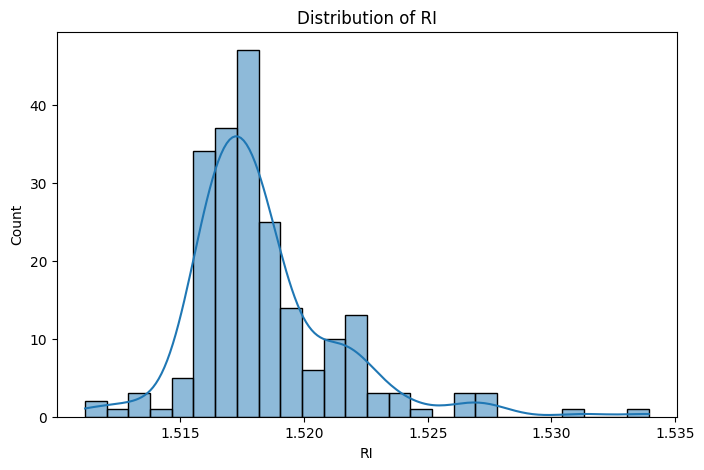

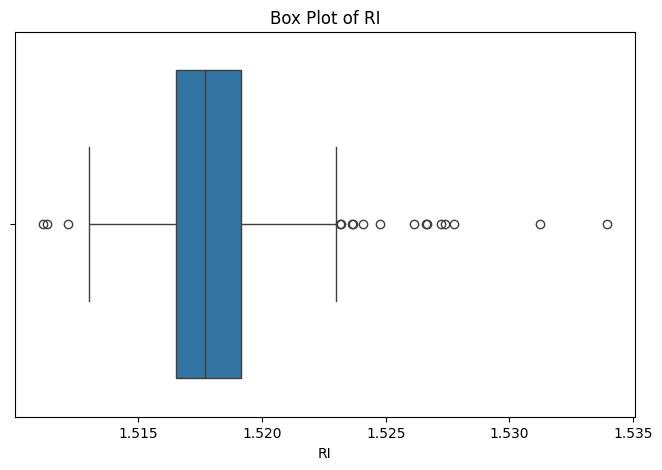

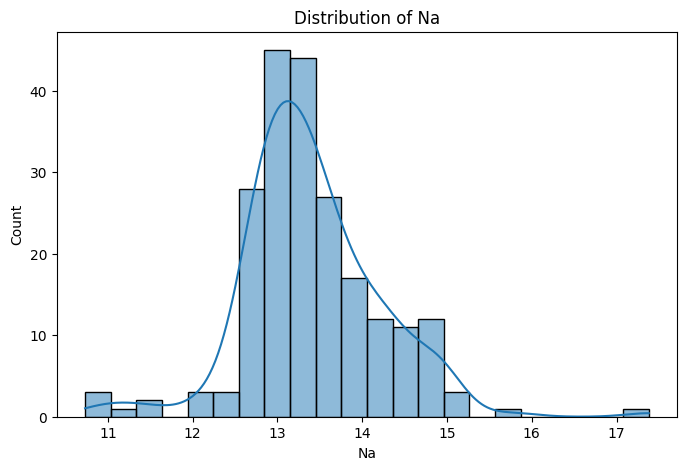

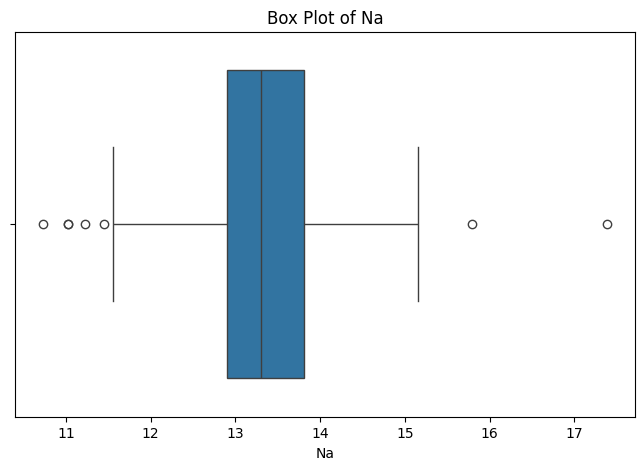

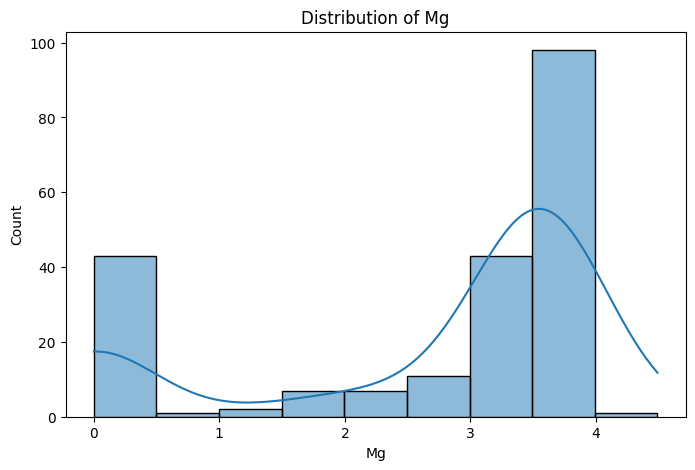

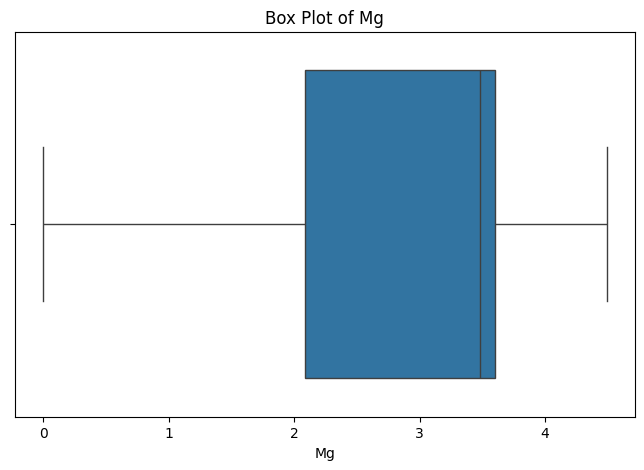

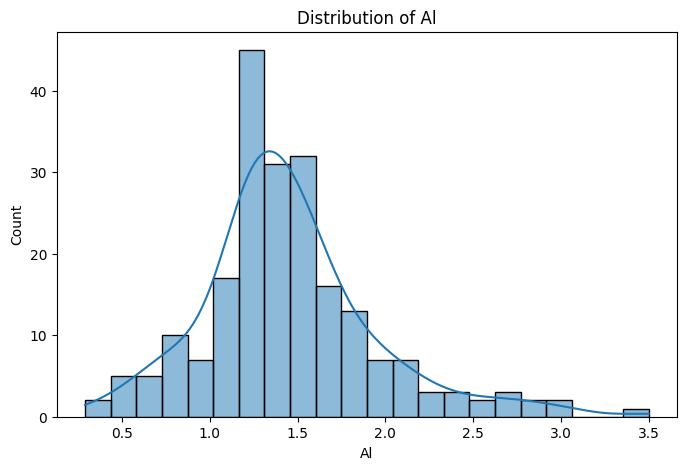

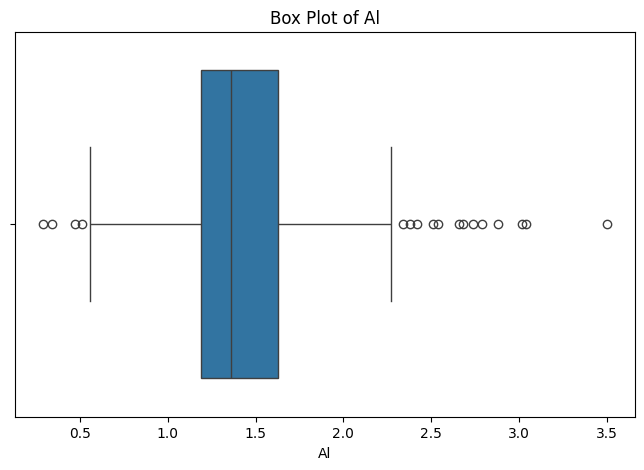

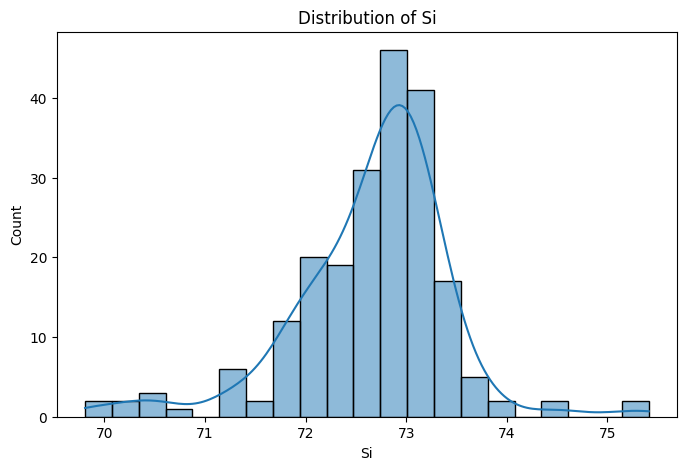

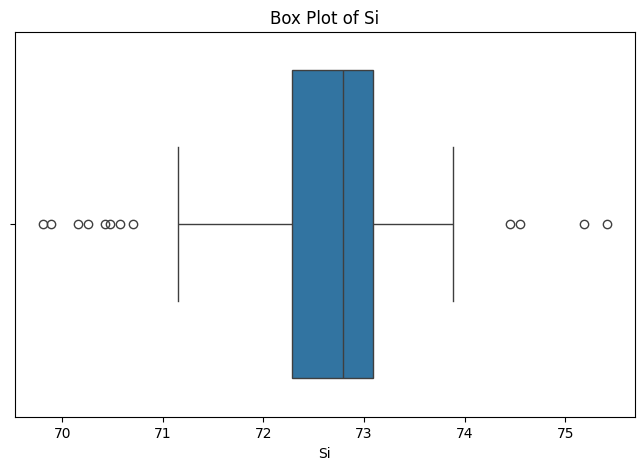

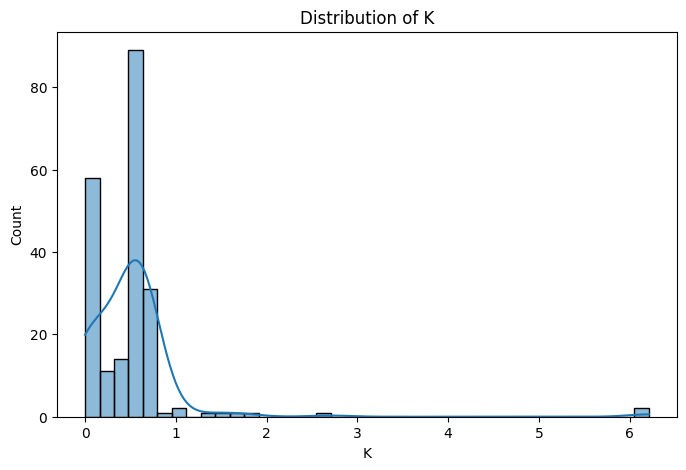

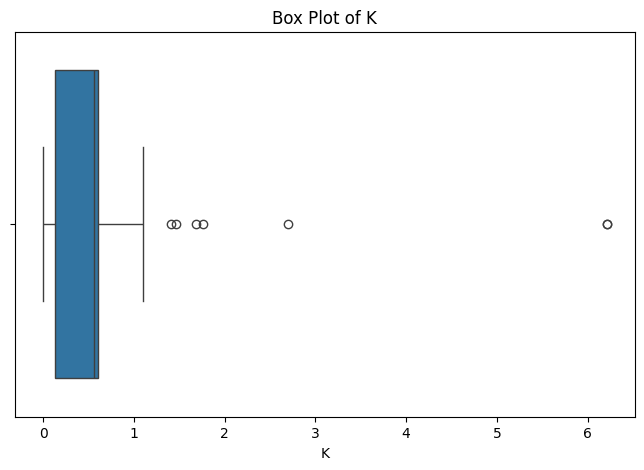

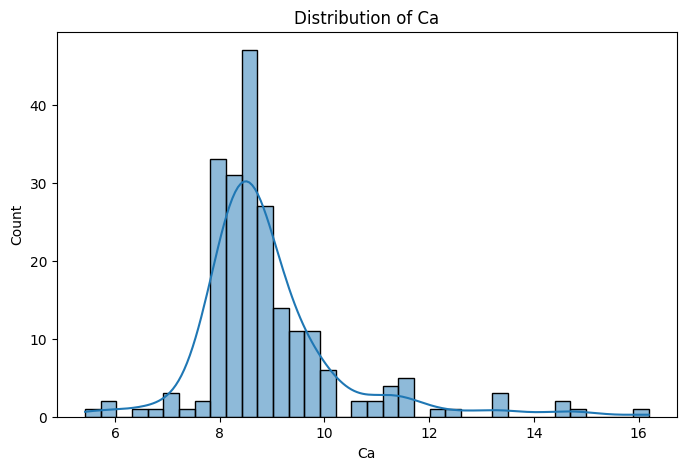

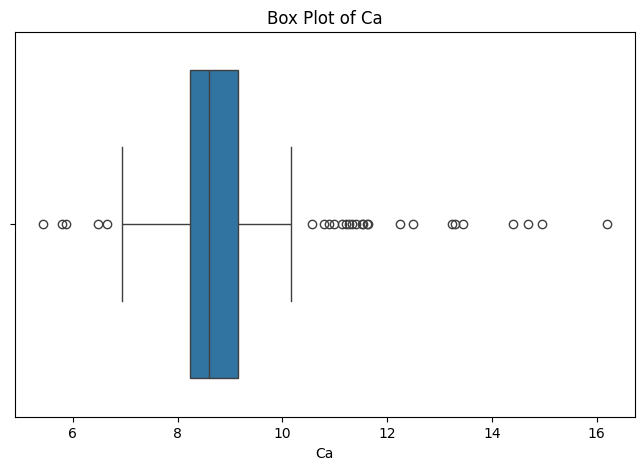

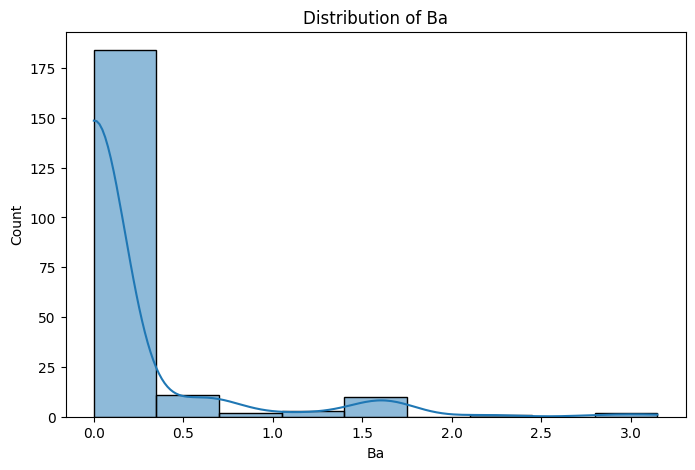

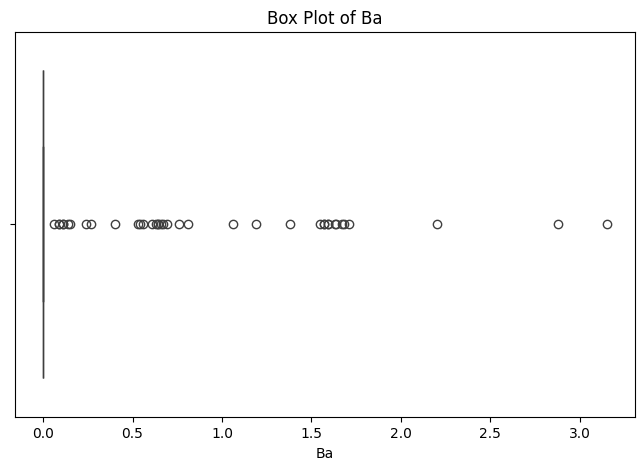

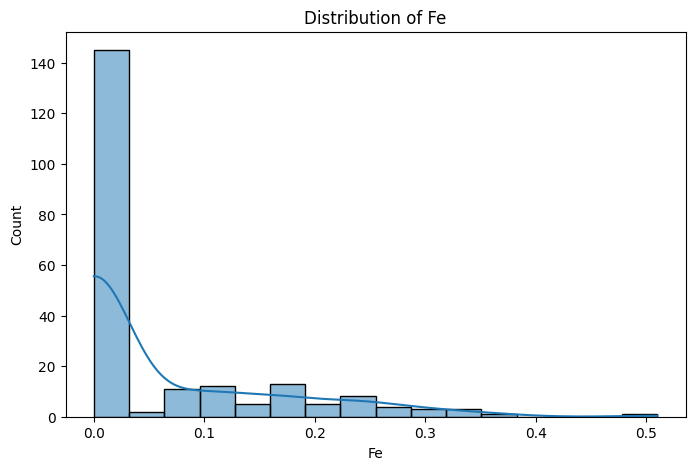

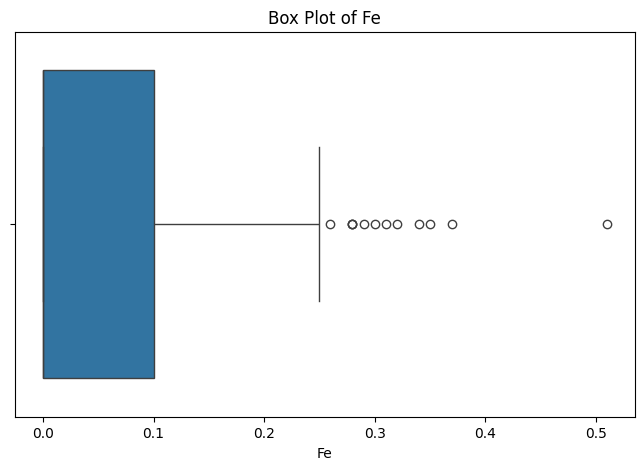

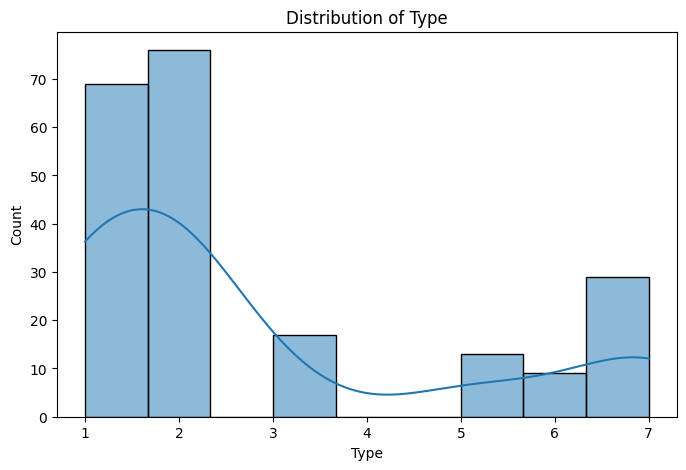

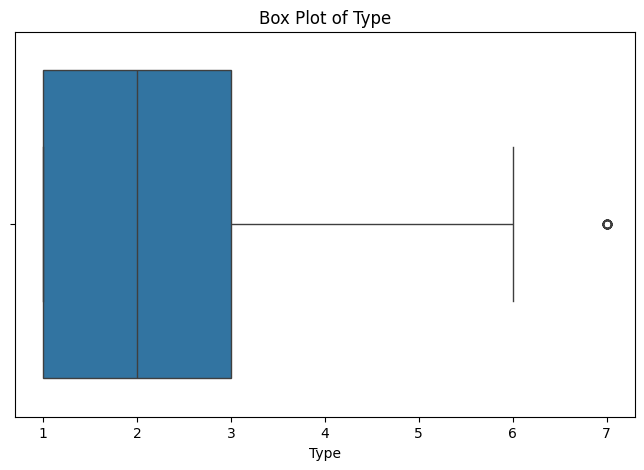

In [9]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

<Axes: >

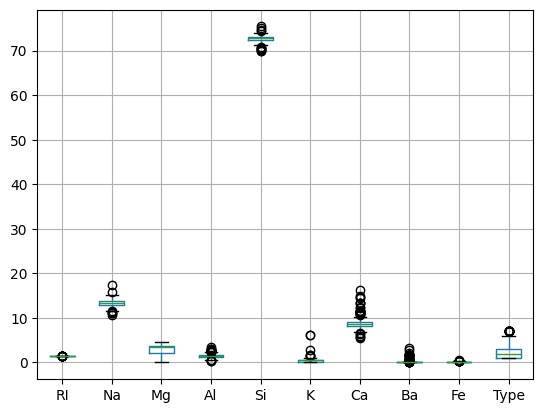

In [10]:
# Outlier detection
df.boxplot()

In [11]:
# Outlier capping
def outlier_capping(df,column):
  Q1=df[column].quantile(0.25)
  Q3=df[column].quantile(0.75)
  IQR= Q3-Q1
  lower_extreme= Q1-1.5*IQR
  upper_extreme= Q3+1.5*IQR
  df[column]= df[column].apply(lambda x: lower_extreme if x<lower_extreme else upper_extreme if x>upper_extreme else x)
for col in df.select_dtypes(['int','float']).columns:
  outlier_capping(df,col)

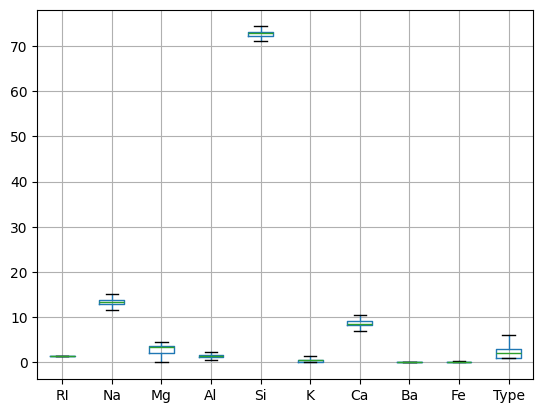

In [12]:
df.boxplot()
plt.show()

3: Data Preprocessing

In [13]:
# Handling missing values
df = df.fillna(df.median())

In [14]:
features = df.drop(columns=['Type'])
target = df['Type']

In [16]:
# Handle imbalance using SMOTE
print("\nBefore SMOTE:", target.value_counts())
sm = SMOTE()


Before SMOTE: Type
2.0    76
1.0    69
6.0    38
3.0    17
5.0    13
Name: count, dtype: int64


In [17]:
x_res, y_res = sm.fit_resample(features, target)
print("After SMOTE:", y_res.value_counts())

After SMOTE: Type
1.0    76
2.0    76
3.0    76
5.0    76
6.0    76
Name: count, dtype: int64


In [18]:
# Feature Scaling
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_res)

4: Random Forest Model Implementation

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_res, test_size=0.2, random_state=42, stratify=y_res)

In [20]:
# Random forest model
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [21]:
rf_pred = rf.predict(x_test)

Accuracy: 0.881578947368421

Classification Report:
               precision    recall  f1-score   support

         1.0       0.86      0.80      0.83        15
         2.0       0.92      0.80      0.86        15
         3.0       0.82      0.93      0.88        15
         5.0       0.94      0.94      0.94        16
         6.0       0.88      0.93      0.90        15

    accuracy                           0.88        76
   macro avg       0.88      0.88      0.88        76
weighted avg       0.88      0.88      0.88        76



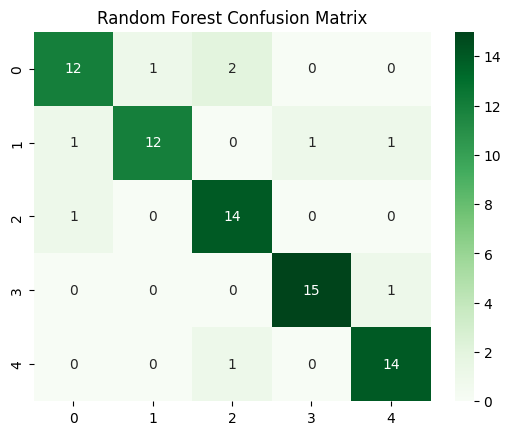

In [22]:
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_pred))

sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest Confusion Matrix")
plt.show()

5: Bagging and Boosting Methods

In [23]:
# Bagging classifier
bag = BaggingClassifier(
    estimator=RandomForestClassifier(),
    n_estimators=50,
    random_state=42
)
bag.fit(x_train, y_train)
bag_pred = bag.predict(x_test)

In [24]:
print("Accuracy:", accuracy_score(y_test, bag_pred))
print("\nClassification Report:\n", classification_report(y_test, bag_pred))

Accuracy: 0.9210526315789473

Classification Report:
               precision    recall  f1-score   support

         1.0       0.87      0.87      0.87        15
         2.0       0.92      0.80      0.86        15
         3.0       0.93      0.93      0.93        15
         5.0       0.94      1.00      0.97        16
         6.0       0.94      1.00      0.97        15

    accuracy                           0.92        76
   macro avg       0.92      0.92      0.92        76
weighted avg       0.92      0.92      0.92        76



In [25]:
# Boosting methods
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(x_train, y_train)
ada_pred = ada.predict(x_test)

In [26]:
print("Accuracy:", accuracy_score(y_test, ada_pred))
print("\nClassification Report:\n", classification_report(y_test, ada_pred))

Accuracy: 0.4473684210526316

Classification Report:
               precision    recall  f1-score   support

         1.0       0.50      0.47      0.48        15
         2.0       0.33      0.47      0.39        15
         3.0       0.56      0.67      0.61        15
         5.0       0.33      0.31      0.32        16
         6.0       0.62      0.33      0.43        15

    accuracy                           0.45        76
   macro avg       0.47      0.45      0.45        76
weighted avg       0.47      0.45      0.45        76



In [27]:
# Gradient boosting
gb = GradientBoostingClassifier(random_state=42)
gb.fit(x_train, y_train)
gb_pred = gb.predict(x_test)

In [28]:
print("Accuracy:", accuracy_score(y_test, gb_pred))
print("\nClassification Report:\n", classification_report(y_test, gb_pred))

Accuracy: 0.9078947368421053

Classification Report:
               precision    recall  f1-score   support

         1.0       0.86      0.80      0.83        15
         2.0       0.87      0.87      0.87        15
         3.0       0.93      0.93      0.93        15
         5.0       1.00      0.94      0.97        16
         6.0       0.88      1.00      0.94        15

    accuracy                           0.91        76
   macro avg       0.91      0.91      0.91        76
weighted avg       0.91      0.91      0.91        76



1. Bagging vs Boosting

Bagging (Bootstrap Aggregating)

Builds multiple models independently on different random subsets of data.

Each model votes → final prediction.

Goal: Reduce variance and prevent overfitting.

Example: Random Forest

a. Simple Example

Like asking 10 friends separately for advice and taking the majority opinion.

Boosting

Builds models one after another.

Each new model tries to correct the mistakes of the previous one.

Goal: Reduce bias and create a strong model.

Examples: AdaBoost, Gradient Boosting, XGBoost

a. Simple Example

Like learning from mistakes step-by-step and improving each time.


2. Explain how to handle imbalance in the data.

When one class has many more samples than another, the model becomes biased.
To fix this, you can use:

1. Oversampling (increase minority class)

SMOTE – creates new synthetic samples

Random Oversampling – duplicating minority samples

2. Undersampling (reduce majority class)

Removes some samples from the majority class

3. Class Weights

Tell model to give more importance to minority class

Many algorithms support: class_weight='balanced'